## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

## Verificando Nulls e Tratando

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [6]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

## Alteração dos valores em inglês para o português

In [7]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df = df.rename(columns={'Person ID': 'ID', 'Gender': 'Gênero', 'Age': 'Idade', 'Occupation': 'Ocupação',
                        'Sleep Duration': 'Duração do Sono', 'Quality of Sleep': 'Qualidade do Sono', 
                        'Physical Activity Level': 'Level de Atividade Física' , 'Stress Level': 'Level de Estresse',
                        'BMI Category': 'Categoria de IMC da Pessoa', 'Blood Pressure': 'Pressão Arterial', 
                        'Heart Rate': 'Frequência cardíaca', 'Daily Steps': 'Passos Diários' , 'Sleep Disorder': 'Distúrbio do Sono'})

In [9]:
df.head()

,ID,Gênero,Idade,Ocupação,Duração do Sono,Qualidade do Sono,Level de Atividade Física,Level de Estresse,Categoria de IMC da Pessoa,Pressão Arterial,Frequência cardíaca,Passos Diários,Distúrbio do Sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
df['Gênero'] = df['Gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

In [11]:
df['Ocupação'].value_counts()

Ocupação
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [12]:
df['Ocupação'] = df['Ocupação'].replace({'Nurse': 'Enfermeira', 'Doctor': 'Médico', 'Engineer': 'Engenheiro', 'Lawyer': 'Advogado',
                                        'Teacher': 'Professor', 'Accountant': 'Contador', 'Salesperson': 'Vendendor',
                                        'Software Engineer': 'Engenheiro de Sofware', 'Scientist': 'Cientista',
                                        'Sales Representative': 'Representante de Vendas', 'Manager': 'Gerente'})

In [13]:
df['Ocupação'].value_counts()

Ocupação
Enfermeira                 73
Médico                     71
Engenheiro                 63
Advogado                   47
Professor                  40
Contador                   37
Vendendor                  32
Engenheiro de Sofware       4
Cientista                   4
Representante de Vendas     2
Gerente                     1
Name: count, dtype: int64

In [14]:
df['Categoria de IMC da Pessoa'].value_counts()

Categoria de IMC da Pessoa
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [15]:
contagem = df.groupby(['Categoria de IMC da Pessoa', 'Pressão Arterial']).size().reset_index(name='contagem')

In [16]:
df['Categoria de IMC da Pessoa'] = df['Categoria de IMC da Pessoa'].replace({'Normal Weight': 'Normal', 
                                                                             'Obese': 'Obeso', 'Overweight': 'Acima do Peso'})

In [17]:
df['Distúrbio do Sono'].value_counts()

Distúrbio do Sono
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [18]:
df['Distúrbio do Sono'] = df['Distúrbio do Sono'].replace({'None': 'Nenhum', 
                                                          'Sleep Apnea': 'Apneia do Sono', 'Insomnia': 'Insônia'})

In [19]:
df.head()

,ID,Gênero,Idade,Ocupação,Duração do Sono,Qualidade do Sono,Level de Atividade Física,Level de Estresse,Categoria de IMC da Pessoa,Pressão Arterial,Frequência cardíaca,Passos Diários,Distúrbio do Sono
0,1,Masculino,27,Engenheiro de Sofware,6.1,6,42,6,Acima do Peso,126/83,77,4200,Nenhum
1,2,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum
2,3,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum
3,4,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono
4,5,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono


## Verificando Outliers

In [20]:
df.describe()

,ID,Idade,Duração do Sono,Qualidade do Sono,Level de Atividade Física,Level de Estresse,Frequência cardíaca,Passos Diários
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


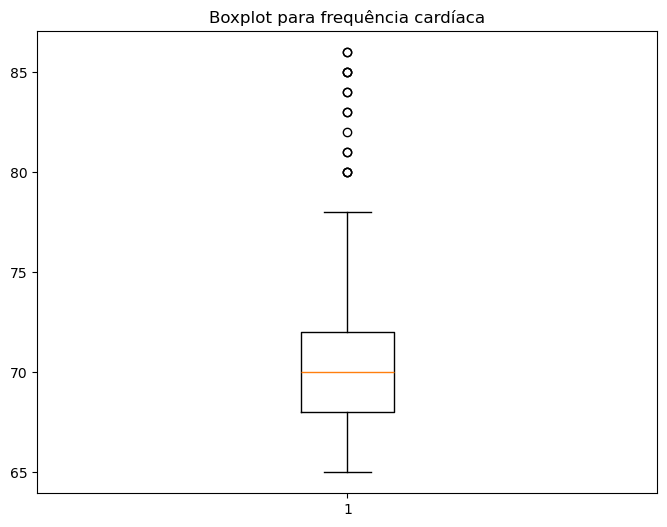

In [21]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Frequência cardíaca'])

plt.title("Boxplot para frequência cardíaca")
plt.show()

## Gráficos 

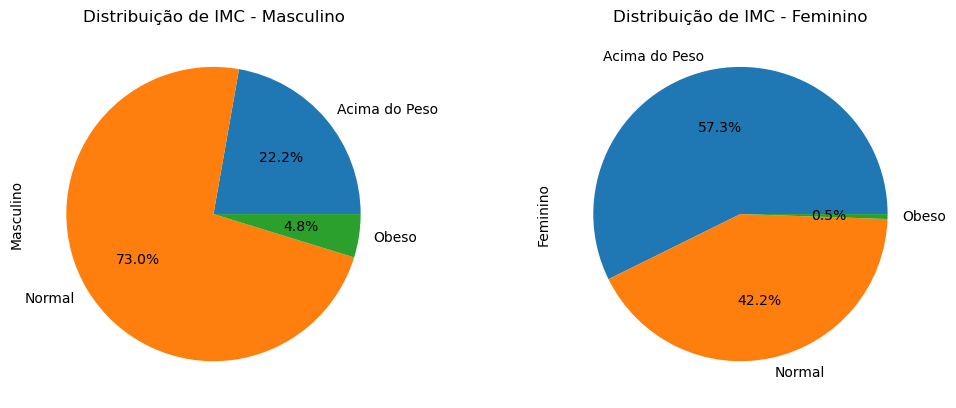

In [22]:
contagem_imc_por_genero = df.groupby(['Gênero', 'Categoria de IMC da Pessoa']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(24, 10))

contagem_imc_por_genero.loc['Masculino'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0], figsize=(10, 7))
axes[0].set_title('Distribuição de IMC - Masculino')

contagem_imc_por_genero.loc['Feminino'].plot(kind='pie', autopct='%1.1f%%', ax=axes[1], figsize=(10, 7))
axes[1].set_title('Distribuição de IMC - Feminino')

plt.subplots_adjust(wspace=5.5)

plt.tight_layout()

plt.show()

<Figure size 1600x1000 with 0 Axes>

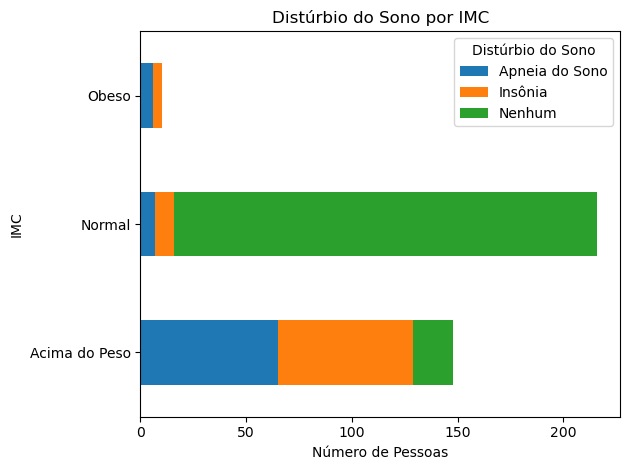

In [23]:
contagem_imc_por_genero = df.groupby(['Categoria de IMC da Pessoa', 'Distúrbio do Sono']).size().unstack()

plt.figure(figsize=(16, 10)) 

contagem_imc_por_genero.plot(kind='barh', stacked=True)

plt.title('Distúrbio do Sono por IMC')
plt.xlabel('Número de Pessoas')
plt.ylabel('IMC')

plt.tight_layout()

plt.show()

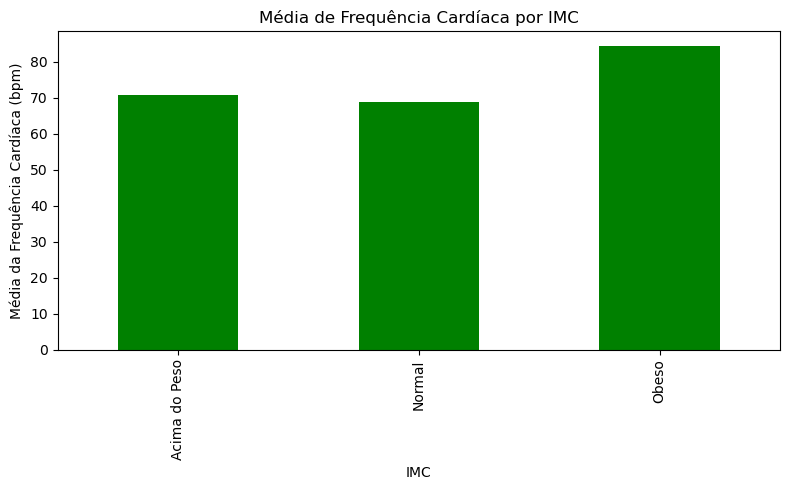

In [24]:
media_frequencia_cardíaca = df.groupby('Categoria de IMC da Pessoa')['Frequência cardíaca'].mean()

plt.figure(figsize=(8, 5))  

media_frequencia_cardíaca.plot(kind='bar', color='green')

plt.title('Média de Frequência Cardíaca por IMC')
plt.xlabel('IMC')
plt.ylabel('Média da Frequência Cardíaca (bpm)')

plt.tight_layout()

plt.show()

## Análise Preditiva

In [25]:
df.head()

,ID,Gênero,Idade,Ocupação,Duração do Sono,Qualidade do Sono,Level de Atividade Física,Level de Estresse,Categoria de IMC da Pessoa,Pressão Arterial,Frequência cardíaca,Passos Diários,Distúrbio do Sono
0,1,Masculino,27,Engenheiro de Sofware,6.1,6,42,6,Acima do Peso,126/83,77,4200,Nenhum
1,2,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum
2,3,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum
3,4,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono
4,5,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono


In [26]:
X = df.iloc[:, [1, 4, 5, 6, 7, 8, 10, 11]].values
y = df.iloc[:, -1].values

In [27]:
X

array([['Masculino', 6.1, 6, ..., 'Acima do Peso', 77, 4200],
       ['Masculino', 6.2, 6, ..., 'Normal', 75, 10000],
       ['Masculino', 6.2, 6, ..., 'Normal', 75, 10000],
       ...,
       ['Feminino', 8.1, 9, ..., 'Acima do Peso', 68, 7000],
       ['Feminino', 8.1, 9, ..., 'Acima do Peso', 68, 7000],
       ['Feminino', 8.1, 9, ..., 'Acima do Peso', 68, 7000]], dtype=object)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,Masculino,6.4,6,45,7,Acima do Peso,72,6000
1,Feminino,6.0,6,90,8,Acima do Peso,75,10000
2,Feminino,6.1,6,90,8,Acima do Peso,75,10000
3,Masculino,7.8,8,90,5,Normal,70,8000
4,Masculino,6.2,6,30,8,Normal,72,5000
...,...,...,...,...,...,...,...,...
294,Feminino,8.5,9,30,3,Normal,65,5000
295,Masculino,6.5,6,45,7,Acima do Peso,72,6000
296,Feminino,7.2,8,60,4,Normal,68,7000
297,Masculino,7.8,7,75,6,Normal,70,8000


In [30]:
scaler = StandardScaler()
X_train[:, [1, 2, 3, 4, 6, 7]] = scaler.fit_transform(X_train[:, [1, 2, 3, 4, 6, 7]])
X_test[:, [1, 2, 3, 4, 6, 7]] = scaler.transform(X_test[:, [1, 2, 3, 4, 6, 7]])

In [31]:
# 1 = Masculino
# 0 = Feminino
lb = LabelEncoder()
X_train[:, 0] = lb.fit_transform(X_train[:, 0])
X_test[:, 0] = lb.transform(X_test[:, 0])

In [32]:
# 1.0.0 = Acima do Peso
# 0.1.0 = Normal
# 0.0.1 = Obeso
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [33]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1,-0.968268,-1.135997,-0.70785,0.970253,0.501892,-0.542508
1,1.0,0.0,0.0,0,-1.473966,-1.135997,1.459186,1.537974,1.25473,1.97335
2,1.0,0.0,0.0,0,-1.347541,-1.135997,1.459186,1.537974,1.25473,1.97335
3,0.0,1.0,0.0,1,0.801675,0.524947,1.459186,-0.16519,0.0,0.715421
4,0.0,1.0,0.0,1,-1.221117,-1.135997,-1.430196,1.537974,0.501892,-1.171473
...,...,...,...,...,...,...,...,...,...,...
294,0.0,1.0,0.0,0,1.686646,1.35542,-1.430196,-1.300632,-1.25473,-1.171473
295,1.0,0.0,0.0,1,-0.841843,-1.135997,-0.70785,0.970253,0.501892,-0.542508
296,0.0,1.0,0.0,0,0.043128,0.524947,0.014495,-0.732911,-0.501892,0.086456
297,0.0,1.0,0.0,1,0.801675,-0.305525,0.736841,0.402531,0.0,0.715421


In [34]:
# 0.1.0 = Insônia
# 1.0.0 = Apneia do Sono
# 0.0.1 = Nenhum
encoder_y = OneHotEncoder(sparse_output=False)
y_train = encoder_y.fit_transform(y_train.reshape(-1, 1))
y_test = encoder_y.transform(y_test.reshape(-1, 1))

In [37]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [38]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [41]:
cm

array([[12,  1,  1],
       [ 2, 15,  3],
       [ 1,  3, 37]], dtype=int64)

In [42]:
ac

0.8533333333333334

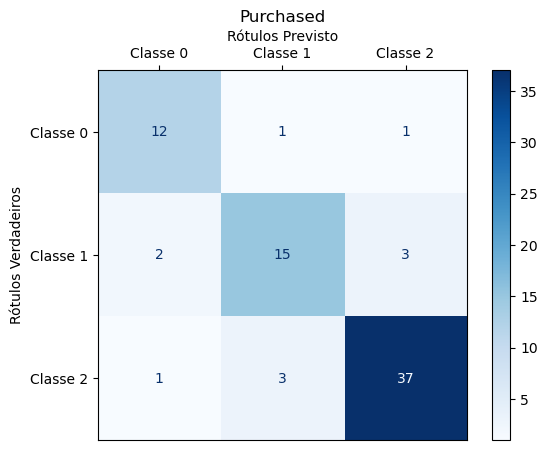

Acurácia: 85.33%


In [44]:
labels = ['Classe 0', 'Classe 1', 'Classe 2']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Blues, ax=ax)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top') 

plt.xticks(rotation=0) 

plt.title("Purchased")  
plt.xlabel("Rótulos Previsto")  
plt.ylabel("Rótulos Verdadeiros") 

plt.show()

print(f"Acurácia: {ac:.2%}")